In [3]:
!pip install py-readability-metrics

In [5]:
!pip install PyPDF2

In [7]:
!pip install NLTK

In [10]:
!pip install wordcloud

In [11]:
import PyPDF2
import nltk
import wordcloud

##### The two articles are focused on Harvard University President, Claudine Gay, and allegations that she committed plaigerism in her PhD thesis. The article from Fox News was more aggressive in it's tone against Gay, seeming to bias towards presumptive guilt of plaigarism. The article from Reuters felt more neutral.

In [32]:
file_locations = [r"C:\Users\jessi\OneDrive\Documents\Babson\OIM7502\foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf",
                  r"C:\Users\jessi\OneDrive\Documents\Babson\OIM7502\reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"]

text = []
for files in range(len(file_locations)):               
    with open(file_locations[files], "rb") as file:
        reader = PyPDF2.PdfReader(file)
        add_text = "".join(page.extract_text() for page in reader.pages)
        text.append(add_text)
        print(add_text)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

##### From the output of the PDF Read function, there are intermittent errors with spacing. It also adds the page numbers as text, and doesn't handle advertisement messages well (including them in the interpretted text).

### Sentiment Analysis with NLTK

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [37]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
sia = SentimentIntensityAnalyzer()
score = []

for articles in range(len(text)):
    text_score = sia.polarity_scores(text[articles])
    score.append(text_score)
    print(text_score)

{'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


##### I found this output surprising, as it is identifying the Fox News story as having strong positive bias, and the Reuters story as having a very strong negative bias. This is the opposite as the impression that I had from reading the articles.

In [35]:
headlines = ["Embattled Harvard University President Claudine Gay hitwith more plagiarism charges", 
             "Harvard president will submit dissertation edits afterplagiarism allegations"]

score_headlines = []

for heads in range(len(headlines)):
    head_score = sia.polarity_scores(headlines[heads])
    score_headlines.append(head_score)
    print(head_score)

{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.3353}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


##### The headlines were more in alignment with my assessment of the articles. This has Fox News headline as showing negative, while the Reuters headline shows as neutral

### Use py-readability-metrics complete 2-3 different readability scores

In [41]:
from readability import Readability
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [52]:
read_scores = []

for articles in range(len(text)):
    read = Readability(text[articles])

    fk = read.flesch_kincaid()
    fre = read.flesch()
    ari = read.ari()

    print("Flesch-Kincaid Score: ", fk, "\nFlesch Reading Ease: ", fre, "\nAutomated Readability Index: ", ari)
    

Flesch-Kincaid Score:  score: 19.21912993097889, grade_level: '19' 
Flesch Reading Ease:  score: 21.41115320671068, ease: 'very_confusing', grade_levels: ['college_graduate'] 
Automated Readability Index:  score: 21.36114766486977, grade_levels: ['college_graduate'], ages: [24, 100]
Flesch-Kincaid Score:  score: 18.706800340389325, grade_level: '19' 
Flesch Reading Ease:  score: 16.550377619402184, ease: 'very_confusing', grade_levels: ['college_graduate'] 
Automated Readability Index:  score: 20.4288288479949, grade_levels: ['college_graduate'], ages: [24, 100]


##### I used a combination of Flesch-Kincaid, Flesh Reading Ease, and Automated Readability Index to measure the readability of the two articles. The Flesch-Kincaid outputs a score to align the article with the US grade level that would be required to understand the article. Flesch Reading Ease gives the article a score on a scale of 0-100 (higher number being easier to read), and Automated Readability Index is another method for identifying the grade level of the material.

##### Both articles scored as very complicated, required college graduate level of education to understand the material. The Fox News article scored as slightly harder. I don't agree with this output, as I think the articles are relatively easy to read from the text. I'm thinking that quotes used in the articles containing more complex words (rather than words used in the substance of the article) drove up the readability difficulty.

### Use wordcloud to create word clouds for each article

In [59]:
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from wordcloud import WordCloud

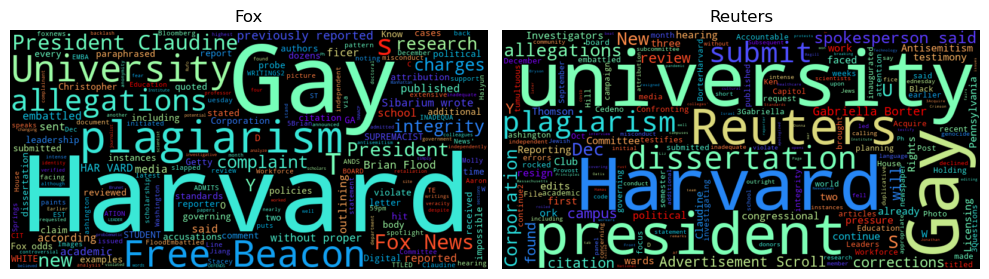

In [62]:
stop_words = set(STOPWORDS)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
news = ['Fox', 'Reuters']

axes = axes.flatten()
for articles in range(len(text)):
    wrd_cld = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="rainbow",
    stopwords=stop_words
    ).generate(text[articles])

    axes[articles].imshow(wrd_cld, interpolation="bilinear")
    axes[articles].axis("off")
    axes[articles].set_title(news[articles])

plt.tight_layout()

##### The two wordclouds for Fox and Reuters show a lot of similar high-use words, such as "Gay", "Harvard", "University", and "Plagiarism". What's interesting is that Fox's wordcloud shows that it uses the words plagiarism and allegations more than Reuters, while Reuters makes more references to "President" to define Gay and references dissertation more. I think these representations further support Fox's verbiage as being more aggressive to Gay, and Reuters' being more neutral. 